In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display

In [2]:
data = pd.read_csv('mumbai_19_23.csv',parse_dates =["date"])
data.head()

,City,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,SR,BP,Xylene,AT,RF,TOT-RF,date,day,month,year
0,Mumbai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,2019-01-06,1,6,2019
1,Mumbai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,2019-02-06,2,6,2019
2,Mumbai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,2019-03-06,3,6,2019
3,Mumbai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,2019-04-06,4,6,2019
4,Mumbai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,2019-05-06,5,6,2019


In [3]:
# drop the unwanted columns/features
cols_to_drop = ['City','Toluene','RF','Xylene','TOT-RF']
dt = data.drop(cols_to_drop,axis=1)
# print out the info of the data
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PM2_5        1324 non-null   float64       
 1   PM10         1289 non-null   float64       
 2   NO           1338 non-null   float64       
 3   NO2          1308 non-null   float64       
 4   NOx          1347 non-null   float64       
 5   NH3          1239 non-null   float64       
 6   SO2          1320 non-null   float64       
 7   CO           1326 non-null   float64       
 8   Ozone        1317 non-null   float64       
 9   Benzene      1327 non-null   float64       
 10  Eth-Benzene  1247 non-null   float64       
 11  MP-Xylene    1248 non-null   float64       
 12  RH           1343 non-null   float64       
 13  WS           1343 non-null   float64       
 14  WD           1343 non-null   float64       
 15  SR           1334 non-null   float64       
 16  BP    

In [4]:
# check for duplicated values and null values
print('Are there any duplicated values in our data ? : {}\n'.format(dt.duplicated().any()))
print('The total number of null values in each colum:')
display(dt.isnull().sum())

Are there any duplicated values in our data ? : False

The total number of null values in each colum:


PM2_5           76
PM10           111
NO              62
NO2             92
NOx             53
NH3            161
SO2             80
CO              74
Ozone           83
Benzene         73
Eth-Benzene    153
MP-Xylene      152
RH              57
WS              57
WD              57
SR              66
BP             999
AT              59
date             0
day              0
month            0
year             0
dtype: int64

In [5]:
# fill in the missing values with the mean of the particular column
dt.fillna(value=dt.mean(),inplace=True)
# let's check the data again if there are any missing values
dt.isnull().any()

PM2_5          False
PM10           False
NO             False
NO2            False
NOx            False
NH3            False
SO2            False
CO             False
Ozone          False
Benzene        False
Eth-Benzene    False
MP-Xylene      False
RH             False
WS             False
WD             False
SR             False
BP             False
AT             False
date           False
day            False
month          False
year           False
dtype: bool

In [6]:
dt.head()

,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,...,RH,WS,WD,SR,BP,AT,date,day,month,year
0,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,...,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645,2019-01-06,1,6,2019
1,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,...,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645,2019-02-06,2,6,2019
2,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,...,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645,2019-03-06,3,6,2019
3,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,...,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645,2019-04-06,4,6,2019
4,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,...,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645,2019-05-06,5,6,2019


In [7]:
def remove_outliers(df, n_std, dataset):
    """
    Removes outliers from a dataset using the z-score method.
    
    Parameters:
        data (array-like): The input dataset.
        n_std (float): The number of standard deviations from the mean to use as the threshold for identifying outliers.
    
    Returns:
        The input dataset with outliers removed.
    """
    z_scores = np.abs((df - np.mean(df)) / np.std(df))
    filtered_data = dataset[z_scores < n_std]
    return filtered_data

In [8]:
df = dt['PM10']
dataset = dt
data = remove_outliers(df, 3, dt)
print(data)

         PM2_5      PM10         NO        NO2        NOx        NH3  \
0     43.72923  93.78294  40.707444  17.742699  56.962205  19.993761   
1     43.72923  93.78294  40.707444  17.742699  56.962205  19.993761   
2     43.72923  93.78294  40.707444  17.742699  56.962205  19.993761   
3     43.72923  93.78294  40.707444  17.742699  56.962205  19.993761   
4     43.72923  93.78294  40.707444  17.742699  56.962205  19.993761   
...        ...       ...        ...        ...        ...        ...   
1395  33.69000  64.74000  16.040000  24.330000  40.380000  19.993761   
1396  39.56000  75.48000  11.490000  21.650000  33.140000  19.993761   
1397  36.16000  70.20000  10.660000  19.370000  29.980000  19.993761   
1398  23.63000  47.11000  11.610000  17.140000  28.740000  19.993761   
1399  17.53000  39.00000  10.210000  16.450000  26.660000  19.993761   

            SO2        CO      Ozone   Benzene  ...         RH        WS  \
0     15.237295  0.719548  12.422893  3.787438  ...  78.124

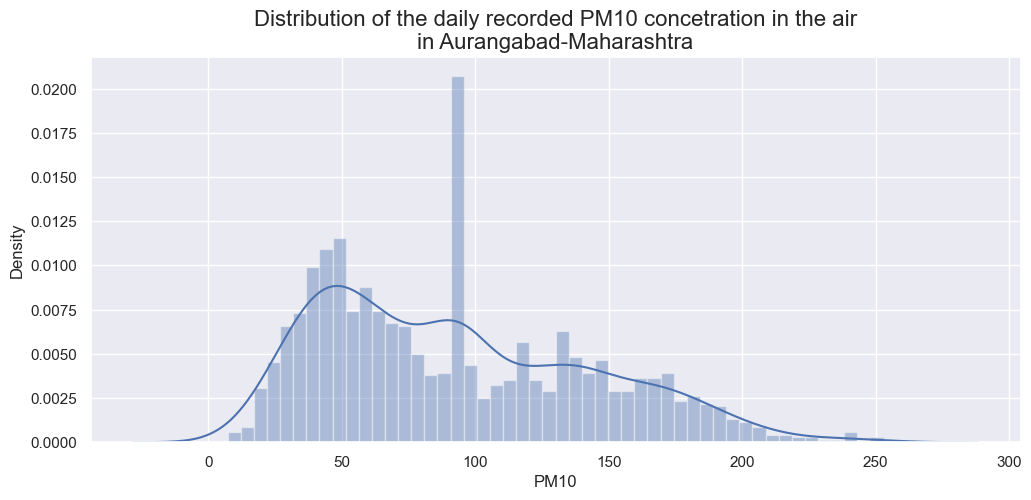

In [9]:
plt.figure(figsize=(12,5))
sns.distplot(data['PM10'],bins=50)
plt.title('Distribution of the daily recorded PM10 concetration in the air\nin Aurangabad-Maharashtra',
          fontsize=16)
plt.show()

In [10]:
import pandas as pd
import numpy as np

months = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']

# convert 'month' column to categorical variable with specified category order
monthly_data = data[['month','PM10']]
#monthly_data['month'] = pd.Categorical(monthly_data['month'], categories=months, ordered=True)

# calculate monthly median of 'PM2_5'
monthly_average = monthly_data.groupby('month')['PM10'].median()

# round the values to one decimal place
monthly_average = np.round(monthly_average, 1)

# convert the resulting Series to a DataFrame
monthly_average = pd.DataFrame(monthly_average)

# set the index to the categorical variable and rename the column
monthly_average.index.name = 'month'
monthly_average.columns = ['median_PM10']

# display the resulting DataFrame
print(monthly_average)

       median_PM10
month             
1            148.2
2            131.1
3            109.5
4             75.1
5             67.4
6             43.3
7             49.2
8             48.2
9             39.2
10            84.5
11           134.5
12           144.3


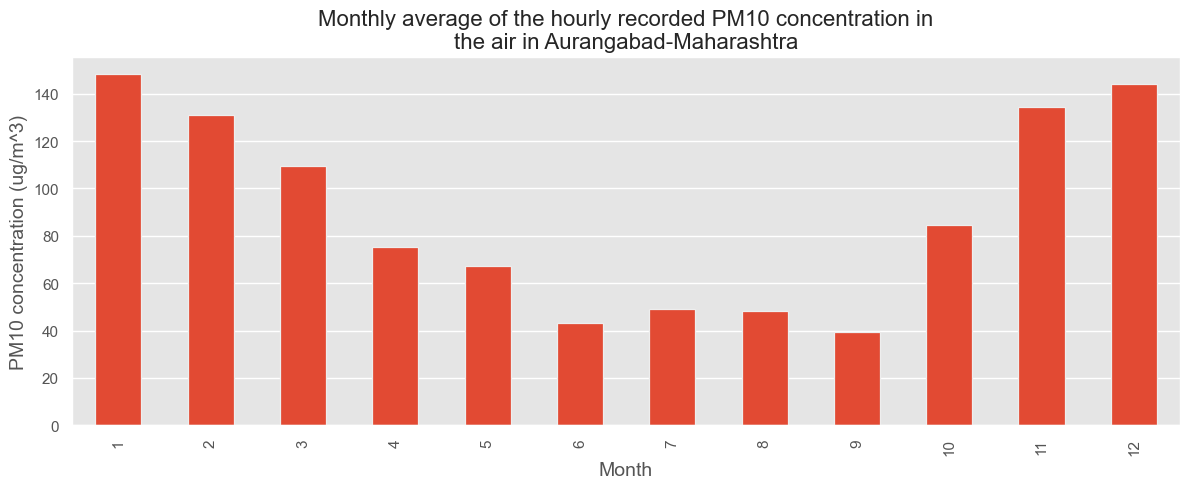

In [11]:
# plot the data
with plt.style.context('ggplot'):
    monthly_average.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Month',fontsize=14)
    plt.ylabel('PM10 concentration (ug/m^3)',fontsize=14)
    plt.title('Monthly average of the hourly recorded PM10 concentration in\nthe air in Aurangabad-Maharashtra',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

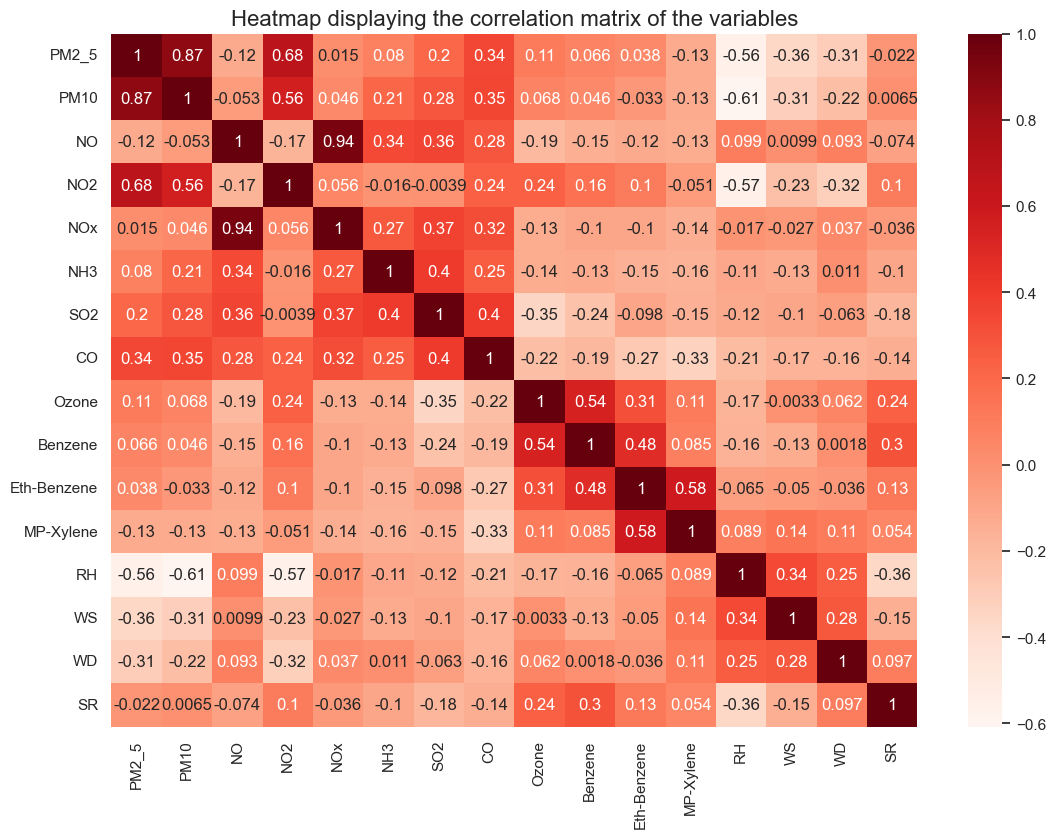

In [12]:
# let's try and visualize the relationships between the features of the data
plt.figure(figsize=(13,9))
correlation_data = data[['PM2_5', 'PM10', 'NO', 'NO2',
                         'NOx', 'NH3', 'SO2', 'CO',
                         'Ozone', 'Benzene','Eth-Benzene','MP-Xylene','RH','WS','WD','SR']]
sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()

In [13]:
cols_to_drop = ['date','year','month','day']
newdata = data.drop(cols_to_drop,axis=1)

# calculate the variance inflation factor of each feature and detect multicollinearity
cons_data = sm.tools.add_constant(newdata)
series_before = pd.Series([variance_inflation_factor(cons_data.values,i) for i in range(cons_data.shape[1])],
                         index=cons_data.columns)
series_before

const          238883.395411
PM2_5               6.201760
PM10                5.530546
NO                 17.967112
NO2                 3.939203
NOx                17.199634
NH3                 1.488376
SO2                 1.931124
CO                  1.752949
Ozone               1.757362
Benzene             1.966255
Eth-Benzene         2.368431
MP-Xylene           1.899290
RH                  2.951524
WS                  1.433288
WD                  1.661801
SR                  1.513025
BP                  1.893886
AT                  2.085456
dtype: float64

In [14]:
newdata.head()

,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Eth-Benzene,MP-Xylene,RH,WS,WD,SR,BP,AT
0,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,9.041395,17.748293,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645
1,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,9.041395,17.748293,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645
2,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,9.041395,17.748293,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645
3,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,9.041395,17.748293,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645
4,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,9.041395,17.748293,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645


In [15]:
columns_to_drop = ['RH','WS','WD','SR',]

newdata = newdata.drop(columns_to_drop,axis=1)
cons_data2 = sm.tools.add_constant(newdata)
series_after = pd.Series([variance_inflation_factor(cons_data2.values,i) for i in range(cons_data2.shape[1])],
                         index=cons_data2.columns)
series_after

const          180084.792657
PM2_5               5.767230
PM10                4.945710
NO                 17.957539
NO2                 3.404975
NOx                17.177110
NH3                 1.463953
SO2                 1.860406
CO                  1.704015
Ozone               1.666453
Benzene             1.911097
Eth-Benzene         2.334197
MP-Xylene           1.877355
BP                  1.482192
AT                  1.275807
dtype: float64

In [16]:
newdata.columns = ['PM2_5','PM10','NO','NO2','NOx','NH3','SO2','CO','Ozone','O','Benzene','Toluene','Eth_Benzene','MP_Xylene']

# PM2.5 is skewed to the right so we log transform the values to normalize the distribution
newdata['PM10'] = np.log(newdata['PM10'])

In [17]:
mul_reg = formula.ols(formula="PM10 ~ PM2_5  + NO + NO2 + NOx + NH3 + SO2 + CO + Ozone + O + Benzene + Toluene + Eth_Benzene + MP_Xylene",
                      data=newdata).fit()
mul_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     292.4
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:31:08   Log-Likelihood:                -351.68
No. Observations:                1393   AIC:                             731.4
Df Residuals:                    1379   BIC:                             804.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -35.6607      3.497    -10.197      0.000     -42.521     -28.801
PM2_5           0.0137      0.000     35.539      0.000       0.013       0.014
NO              0.0004      0.001      0.770      0.441      -0.001       0.001
NO2             0.0015      0.001      1.510      0.131      -0.000       0.003
NOx            -0.0006      0.000     -1.145      0.252      -0.002       0.000
NH3             0.0014      0.000      6.104      0.000       0.001       0.002
SO2             0.0059      0.001      5.918      0.000       0.004       0.008
CO             -0.0223      0.021     -1.055      0.292      -0.064       0.019
Ozone           0.0021      0.001      3.198      0.001       0.001       0.003
O               0.0061      0.002      3.935      0.000       0.003       0.009
Benzene        -0.0175      0.002     -7.044      0.000      -0.022      -0.013
Toluene         0.0055      0.001      6.186      0.000       0.004       0.007
Eth_Benzene     0.0385      0.003     11.113      0.000       0.032       0.045
MP_Xylene       0.0225      0.005      4.829      0.000       0.013       0.032
==============================================================================
Omnibus:                      105.982   Durbin-Watson:                   0.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.567
Skew:                          -0.502   Prob(JB):                     3.11e-46
Kurtosis:                       4.613   Cond. No.                     4.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# we split the data into predictor variables and Outcome variable
X = newdata.drop('PM10',axis=1)
y = newdata['PM10']

# we need to scale or normalize the predictor variables since they are not on the same
# scale and some of their distributions are skewed.
X_scaled =  preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.dropna(inplace=True)
# print the scaled predictor variables.
X_scaled.head()

,PM2_5,NO,NO2,NOx,NH3,SO2,CO,Ozone,O,Benzene,Toluene,Eth_Benzene,MP_Xylene
0,0.008359,-0.000701,0.001813,-0.000236,0.001497,0.003063,0.002897,-0.002528,-0.002315,-0.004818,-0.004452,-3.926660e-14,-0.011555
1,0.008359,-0.000701,0.001813,-0.000236,0.001497,0.003063,0.002897,-0.002528,-0.002315,-0.004818,-0.004452,-3.926660e-14,-0.011555
2,0.008359,-0.000701,0.001813,-0.000236,0.001497,0.003063,0.002897,-0.002528,-0.002315,-0.004818,-0.004452,-3.926660e-14,-0.011555
3,0.008359,-0.000701,0.001813,-0.000236,0.001497,0.003063,0.002897,-0.002528,-0.002315,-0.004818,-0.004452,-3.926660e-14,-0.011555
4,0.008359,-0.000701,0.001813,-0.000236,0.001497,0.003063,0.002897,-0.002528,-0.002315,-0.004818,-0.004452,-3.926660e-14,-0.011555


In [19]:
y.head()

0    4.540983
1    4.540983
2    4.540983
3    4.540983
4    4.540983
Name: PM10, dtype: float64

In [20]:
# we now split out data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)

# instantiate the linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)   # fit the model

LinearRegression()

In [21]:
# we now score the model
print('Score on train data: {}\n'.format(lin_model.score(X_train,y_train)))
print('Score on test data: {}'.format(lin_model.score(X_test,y_test)))

Score on train data: 0.7269782689908828

Score on test data: 0.7469173185137945


In [22]:
prediction = lin_model.predict(X_test)
mse = mean_squared_error(y_test,prediction)
accuracy = r2_score(y_test,prediction)

print('Mean Squared Error: {}\n'.format(mse))
print('Overall model accuracy: {}'.format(accuracy))

Mean Squared Error: 0.0916085183559291

Overall model accuracy: 0.7469173185137945


In [23]:
ensemble_data = data.drop(cols_to_drop,axis=1)

# we split the data into predictor variables and Outcome variable
X = ensemble_data.drop('PM10',axis=1)
y = ensemble_data['PM10']

In [24]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.3)

In [25]:
# we go ahead to use the ensemble methods as the LinearRegression model has a low accuracy
# on both the test and train data.
decision_tree = DecisionTreeRegressor(max_depth=5,
                                     max_features='auto',
                                     min_samples_split=3,
                                     min_samples_leaf=2)
decision_tree.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=2,
                      min_samples_split=3)

In [26]:
# we now score the model
print('Score on train data: {}\n'.format(decision_tree.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(decision_tree.score(xtest,ytest)))

tree_pred = decision_tree.predict(xtest)
tree_mse = mean_squared_error(ytest,tree_pred)
tree_accuracy = r2_score(ytest,tree_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_mse)))
print('Overall model accuracy: {}'.format(tree_accuracy))

Score on train data: 0.8690432131434926

Score on test data: 0.7969485579503874

Root Mean Squared Error: 22.093865827733893

Overall model accuracy: 0.7969485579503874


In [27]:
# We now tune the parameters of the model to see if we can increase the accuracy
params = {'max_depth':[3,4,5,6,7],
         'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9,10],
         'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}

tree = DecisionTreeRegressor()

# initialize the grid search for the best parameters
tree_search = GridSearchCV(tree,param_grid=params,
                          n_jobs=-1,cv=5)

tree_search.fit(xtrain,ytrain)   # fit the model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [28]:
# we now score the model
print('Score on train data: {}\n'.format(tree_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(tree_search.score(xtest,ytest)))
print('Best parameters found:')
display(tree_search.best_params_)

tree_search_pred = tree_search.predict(xtest)
tree_search_mse = mean_squared_error(ytest,tree_search_pred)
tree_search_accuracy = r2_score(ytest,tree_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_search_mse)))
print('Overall model accuracy: {}'.format(tree_search_accuracy))

Score on train data: 0.8639430823288358

Score on test data: 0.7917195738496344

Best parameters found:


{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10}

Root Mean Squared Error: 22.376538348060308

Overall model accuracy: 0.7917195738496344


In [29]:
dtpredicted=tree_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from Decision_tree':dtpredicted.tolist()})
df.to_excel('decision_tree_10.xlsx')

In [30]:
# instantiate the RandomForestRegressor model and fit the model on the training data
forest = RandomForestRegressor(n_estimators=100,
                              max_depth=7,
                              max_features='auto',
                              min_samples_split=7,
                              min_samples_leaf=3)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=7)

In [31]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.9329015712550168

Score on test data: 0.8600456891751512

Root Mean Squared Error: 18.342638762553975

Overall model accuracy: 0.8600456891751512


In [32]:
# we now tune the parameters of the RandomForestRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['n_estimators'] = [100,200,300,400,500]

# instantiate the model
random_forest = RandomForestRegressor()

# perform the grid search for the best parameters
forest_search = RandomizedSearchCV(random_forest,params,n_jobs=-1,
                                   cv=5,verbose=2)
forest_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [33]:
# we now score the model
print('Score on train data: {}\n'.format(forest_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest_search.score(xtest,ytest)))
print('Best parameters found:')
display(forest_search.best_params_)

forest_search_pred = forest_search.predict(xtest)
forest_search_mse = mean_squared_error(ytest,forest_search_pred)
forest_search_accuracy = r2_score(ytest,forest_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_search_mse)))
print('Overall model accuracy: {}'.format(forest_search_accuracy))

Score on train data: 0.9302744750918257

Score on test data: 0.8561067153763443

Best parameters found:


{'n_estimators': 100,
 'min_samples_split': 9,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 7}

Root Mean Squared Error: 18.598971816971993

Overall model accuracy: 0.8561067153763443


In [34]:
rfpredicted=forest_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from random_forest':rfpredicted.tolist()})
df.to_excel('randomforest_10.xlsx')

In [35]:
# instantiate the GradientBoostingRegressor model and fit the model on the training data
grad_boost = GradientBoostingRegressor(n_estimators=100,
                                      max_depth=7,
                                      max_features='auto',
                                      min_samples_split=7,
                                      min_samples_leaf=3,
                                      learning_rate=0.1)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(max_depth=7, max_features='auto', min_samples_leaf=3,
                          min_samples_split=7)

In [36]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9988702073545148

Score on test data: 0.8901202444173847

Root Mean Squared Error: 16.252774717171956

Overall model accuracy: 0.8901202444173847


In [37]:
# we now tune the parameters of the GradientBoostingRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['learning_rate'] = np.linspace(0.1,1,10)

# instantiate the model
gradient_boosting = GradientBoostingRegressor()

# perform the grid search for the best parameters
gboost_search = RandomizedSearchCV(gradient_boosting,params,n_jobs=-1,
                                   cv=5,verbose=2)
gboost_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [38]:
# we now score the model
print('Score on train data: {}\n'.format(gboost_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(gboost_search.score(xtest,ytest)))
print('Best parameters found:')
display(gboost_search.best_params_)

gboost_search_pred = gboost_search.predict(xtest)
gboost_search_mse = mean_squared_error(ytest,gboost_search_pred)
gboost_search_accuracy = r2_score(ytest,gboost_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_search_mse)))
print('Overall model accuracy: {}'.format(gboost_search_accuracy))

Score on train data: 0.9501221204013919

Score on test data: 0.8352335158138053

Best parameters found:


{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 3,
 'learning_rate': 0.2}

Root Mean Squared Error: 19.902292770311707

Overall model accuracy: 0.8352335158138053


In [39]:
xgpredicted=gboost_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from Xgboost':xgpredicted.tolist()})
df.to_excel('Xgboost_10.xlsx')

In [40]:
xgpredicted.tolist()
print(len(y.tolist()),len(xgpredicted.tolist()))

1393 1393
